In [1]:
from manim import *

config.verbosity = "WARNING"

Manim Community v0.16.0.post0

In [31]:
import random
import statistics
# lets write a function to generate...particles with right average

def make_n_average(n, avg):
    l = []
    j = []
    k = []
    for i in range(n):
        l.append(random.random())
        j.append(random.gauss(0, 1))
        k.append(random.normalvariate(0, 1))
    
    print(statistics.mean(l), statistics.mean(j), statistics.mean(k))
    
make_n_average(1000, 1)

0.49457222338867934 -0.003429109932768113 0.06255251255991533


In [85]:
%%manim --quality=m -r 720,720 TemperatureEntropy

#%%manim --quality=l -r 720,720 --save_last_frame TemperatureEntropy
from manim.utils import rate_functions
import math
import numpy as np
import random
from scipy.spatial.transform import Rotation as R
MAX_VELO = 65
class AnimHandler(Animation):
    def __init__(self, dots, traced_paths, velo_factors, duration=10, **kwargs):
        super().__init__(dots, **kwargs)
        self._dots = dots
        self._traced = traced_paths
        self._alpha = 0
        self._duration = duration
        
        self._bounds = 5.8

        self.normalized_acceleration = 5
        self.velo_factors = velo_factors
        self._dot_colors = []

        self.normalized_positions = {}
        self.normalized_velocities = {}
        self._colors = ['#ffffe0', '#ffecd2', '#ffdac4', '#ffc6b6', '#ffb3a7', '#ff9e99', '#fb8a8c', '#f4777f', '#eb6574', '#e15268', '#d5405e', '#c82d54', '#b81b4a', '#a70842', '#93003a'] 
        # https://www.vis4.net/palettes/#/9|s|ffffe0,ff005e,93003a|ffffe0,ff005e,93003a|1|1
        for i, dot in self._dots.submob_dict.items():
            self.normalized_positions[i] = np.array([dot.get_x(), dot.get_y(), dot.get_z()])
            theta = random.random()*math.pi*2
            self.normalized_velocities[i] = np.array([math.cos(theta), math.sin(theta), 0])*self.velo_factors[i]
            color_index = self._colors[round(self.velo_factors[i]/MAX_VELO*(len(self._colors) - 1))]
            self._dot_colors.append(color_index)
    def interpolate_mobject(self, alpha: float):
       
        dt = (alpha - self._alpha)*(self._duration/10) #normalize so behavior looks the same as you change duration
        for i, dot in self._dots.submob_dict.items():
            self.normalized_velocities[i] += self.normalized_velocities[i]*self.normalized_acceleration*dt
            self.normalized_positions[i] +=  self.normalized_velocities[i]*dt

            for j in range(3):
                if self.normalized_positions[i][j] > self._bounds or self.normalized_positions[i][j] < -self._bounds:
                    self.normalized_velocities[i][j] *= -1;
            target_color = self._dot_colors[i]
            dot.set_x(self.normalized_positions[i][0])
            dot.set_y(self.normalized_positions[i][1])
            dot.set_z(self.normalized_positions[i][2])
            dot.set_fill(target_color)
            self._traced[i].stroke_color = target_color
        
        self._alpha = alpha

    def reset_for_static(self, duration):
        """Reset for non-accelerating animation"""
        self._alpha = 0
        self.normalized_acceleration = 0
        self._colors = [self._colors[-1]]
        self._duration = duration
        

class TemperatureEntropy(Scene):
    def construct(self):
        box_size = 12
        r = Square(side_length=box_size + 0.2, stroke_width=10)
        # k = self.make_particle(0, 1, r, 5*5)
        buf=0.1
        count = 16
        count_on_side = math.sqrt(count)
        radius = 0.5*(box_size - buf*count_on_side)/count_on_side
        circles = VDict([(i, Circle(radius, color="#ffffe0")) for i in range(0, count)])
        circles.arrange_in_grid(rows=int(count_on_side), buff=buf)

        dots = VDict([(i, Dot(point=c.get_center(), radius=0.2)) for (i,c) in circles.submob_dict.items()])
        t = VDict([(i, TracedPath(dot.get_center, dissipating_time=0.5)) for (i, dot) in dots.submob_dict.items()])
        self.add(r, dots, t)
        a = AnimHandler(dots, t, list(range(1,21)))
        
        a.reset_for_static(5)
        self.play(a, run_time=5, run_func=linear)
    # def make_particle(self, index, momentum, box, total_particles):
    #     # Assume total_particles is a perfect square
    #     center = box.get_center()
    #     width = box.width
    #     height = box.height
    #     count_on_side = math.sqrt(total_particles)
    #     radius = 0.5*width/count_on_side
    #     x_index = index % count_on_side
    #     y_index = index // count_on_side
    #     buffer = radius*0.15

    #     position = [center[0] - (width/2) + (x_index*radius) + radius + buffer, center[1] - height/2 + y_index*radius + radius + buffer, center[2]]
    #     return Circle(radius=radius, arc_center=position)

In [105]:
equal = [20]*16
biased = [5]*12 + [(20*16 - 5*12)/4]*4
random.shuffle(equal)
random.shuffle(biased)

In [89]:
statistics.mean(biased), biased

(20.0, [5, 65.0, 5, 5, 5, 5, 65.0, 5, 5, 5, 65.0, 65.0, 5, 5, 5, 5])

In [112]:
%%manim --quality=m -r 720,720 TemperatureEntropyEqual
#%%manim --quality=l -r 720,720 --save_last_frame TemperatureEntropy

class TemperatureEntropyEqual(Scene):
    def construct(self):
        box_size = 12
        r = Square(side_length=box_size + 0.2, stroke_width=10)
        # k = self.make_particle(0, 1, r, 5*5)
        buf=0.1
        count = 16
        count_on_side = math.sqrt(count)
        radius = 0.5*(box_size - buf*count_on_side)/count_on_side
        circles = VDict([(i, Circle(radius, color="#ffffe0")) for i in range(0, count)])
        circles.arrange_in_grid(rows=int(count_on_side), buff=buf)

        dots = VDict([(i, Dot(point=c.get_center(), radius=0.2)) for (i,c) in circles.submob_dict.items()])
        t = VDict([(i, TracedPath(dot.get_center, dissipating_time=0.5)) for (i, dot) in dots.submob_dict.items()])
        self.add(r, dots, t)
        a = AnimHandler(dots, t, equal)
        
        a.reset_for_static(5)
        self.play(a, run_time=5, run_func=linear)

In [120]:
%%manim --quality=m -r 720,720 TemperatureEntropyBiased
#%%manim --quality=l -r 720,720 --save_last_frame TemperatureEntropyBiased


class TemperatureEntropyBiased(Scene):
    def construct(self):
        box_size = 12
        r = Square(side_length=box_size + 0.2, stroke_width=10)
        # k = self.make_particle(0, 1, r, 5*5)
        buf=0.1
        count = 16
        count_on_side = math.sqrt(count)
        radius = 0.5*(box_size - buf*count_on_side)/count_on_side
        circles = VDict([(i, Circle(radius, color="#ffffe0")) for i in range(0, count)])
        circles.arrange_in_grid(rows=int(count_on_side), buff=buf)

        dots = VDict([(i, Dot(point=c.get_center(), radius=0.2)) for (i,c) in circles.submob_dict.items()])
        t = VDict([(i, TracedPath(dot.get_center, dissipating_time=0.5)) for (i, dot) in dots.submob_dict.items()])
        self.add(r, dots, t)
        a = AnimHandler(dots, t, biased)
        
        a.reset_for_static(5)
        self.play(a, run_time=5, run_func=linear)

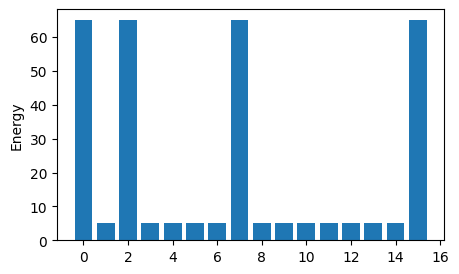

In [116]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))

ax.bar(range(16), biased)

ax.set_ylabel('Energy')
ax.set_title('')


plt.show()

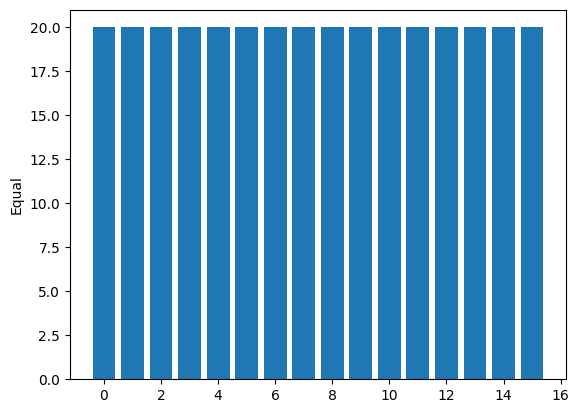

In [114]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(range(16), equal)

ax.set_ylabel('Equal')
ax.set_title('')


plt.show()